In [70]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import DBSCAN
import hdbscan
from sklearn.neighbors import NearestNeighbors

In [71]:
data = pd.read_csv("data/csv/still/0/wo_1_1_0.csv")

data_original = data.copy()

data.head()

,timestamps,csi_len,channel,err_info,noise_floor,rate,bandWidth,num_tones,nr,nc,...,payload_length,block_length,subcarriers,ant1_amplitude,ant2_amplitude,ant1_phase,ant2_phase,with_receiver,coord1,coord2
0,429192390,560,2437,0,0,140,0,56,2,2,...,1320,1904,1,27.459060,92.070625,0.992894,-1.418147,0,1,1
1,429192390,560,2437,0,0,140,0,56,2,2,...,1320,1904,2,27.459060,167.839209,-0.992894,1.994465,0,1,1
2,429192390,560,2437,0,0,140,0,56,2,2,...,1320,1904,3,28.844410,94.339811,0.982794,-1.485895,0,1,1
3,429192390,560,2437,0,0,140,0,56,2,2,...,1320,1904,4,29.154759,174.642492,-1.030377,1.983207,0,1,1
4,429192390,560,2437,0,0,140,0,56,2,2,...,1320,1904,5,30.805844,89.453899,0.946773,-1.470015,0,1,1


In [72]:
variances = data.var()
print(variances)

low_variance_cols = variances[variances < 5e-3].index.tolist()
print("Columns with low or zero variance:")
print(low_variance_cols)

timestamps        4.042297e+10
csi_len           1.054321e+04
channel           0.000000e+00
err_info          0.000000e+00
noise_floor       0.000000e+00
rate              6.825097e+00
bandWidth         0.000000e+00
num_tones         0.000000e+00
nr                0.000000e+00
nc                1.344798e-01
rssi              7.712288e+00
rssi1             3.538144e+00
rssi2             9.773173e+00
rssi3             0.000000e+00
payload_length    7.904626e+03
block_length      2.064334e+04
subcarriers       2.612566e+02
ant1_amplitude    4.604656e+03
ant2_amplitude    5.217707e+03
ant1_phase        3.340821e+00
ant2_phase        3.296569e+00
with_receiver     0.000000e+00
coord1            0.000000e+00
coord2            0.000000e+00
dtype: float64
Columns with low or zero variance:
['channel', 'err_info', 'noise_floor', 'bandWidth', 'num_tones', 'nr', 'rssi3', 'with_receiver', 'coord1', 'coord2']


In [73]:
data.drop(low_variance_cols, axis=1, inplace=True)
data.drop(['csi_len', 'rate', 'payload_length', 'block_length'], axis=1, inplace=True)
data.drop('timestamps', axis=1, inplace=True)
data.head()

,nc,rssi,rssi1,rssi2,subcarriers,ant1_amplitude,ant2_amplitude,ant1_phase,ant2_phase
0,2,58,52,57,1,27.459060,92.070625,0.992894,-1.418147
1,2,58,52,57,2,27.459060,167.839209,-0.992894,1.994465
2,2,58,52,57,3,28.844410,94.339811,0.982794,-1.485895
3,2,58,52,57,4,29.154759,174.642492,-1.030377,1.983207
4,2,58,52,57,5,30.805844,89.453899,0.946773,-1.470015


In [74]:
# features_to_scale = ['csi_len', 'payload_length', 'block_length', 'ant1_amplitude', 'ant2_amplitude', 'ant1_phase', 'ant2_phase', 'rssi', 'rssi1', 'rssi2']
features_to_scale = ['ant1_phase', 'ant2_phase', 'rssi', 'rssi1', 'rssi2']
scaler = StandardScaler()

# Apply standardization on features
# data = data_cleaned.copy()
data[features_to_scale] = scaler.fit_transform(data[features_to_scale])
data.head()

,nc,rssi,rssi1,rssi2,subcarriers,ant1_amplitude,ant2_amplitude,ant1_phase,ant2_phase
0,2,-0.679725,-1.154376,-0.442531,1,27.459060,92.070625,0.550737,-0.771030
1,2,-0.679725,-1.154376,-0.442531,2,27.459060,167.839209,-0.535719,1.108552
2,2,-0.679725,-1.154376,-0.442531,3,28.844410,94.339811,0.545210,-0.808344
3,2,-0.679725,-1.154376,-0.442531,4,29.154759,174.642492,-0.556226,1.102351
4,2,-0.679725,-1.154376,-0.442531,5,30.805844,89.453899,0.525503,-0.799598


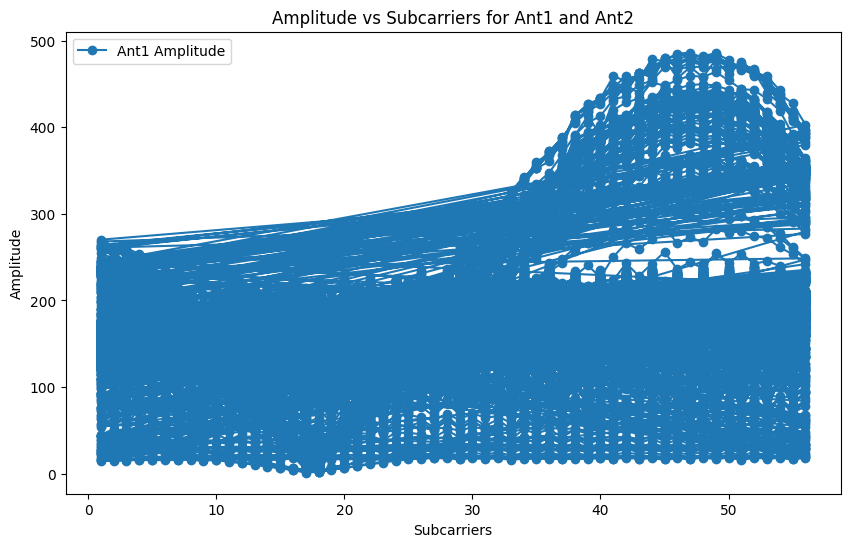

In [75]:
# Plotting the data
plt.figure(figsize=(10, 6))

# Plot Ant1 and Ant2 amplitudes
plt.plot(data["subcarriers"], data["ant1_amplitude"], label="Ant1 Amplitude", marker='o')
# plt.plot(data["subcarriers"], data["ant2_amplitude"], label="Ant2 Amplitude", marker='x')

# Adding labels and title
plt.xlabel("Subcarriers")
plt.ylabel("Amplitude")
plt.title("Amplitude vs Subcarriers for Ant1 and Ant2")
plt.legend()

# Show the plot
plt.show()

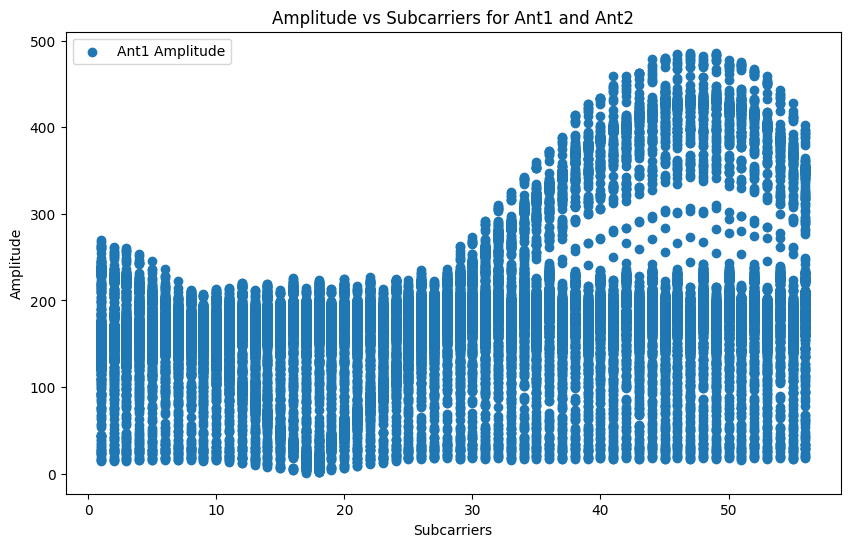

In [76]:
# Plotting the data
plt.figure(figsize=(10, 6))
data_nc1 = data[data['nc'] == 2]
# Plot Ant1 and Ant2 amplitudes
plt.scatter(data["subcarriers"], data["ant1_amplitude"], label="Ant1 Amplitude", marker='o')
# plt.plot(data["subcarriers"], data["ant2_amplitude"], label="Ant2 Amplitude", marker='x')

# Adding labels and title
plt.xlabel("Subcarriers")
plt.ylabel("Amplitude")
plt.title("Amplitude vs Subcarriers for Ant1 and Ant2")
plt.legend()

# Show the plot
plt.show()

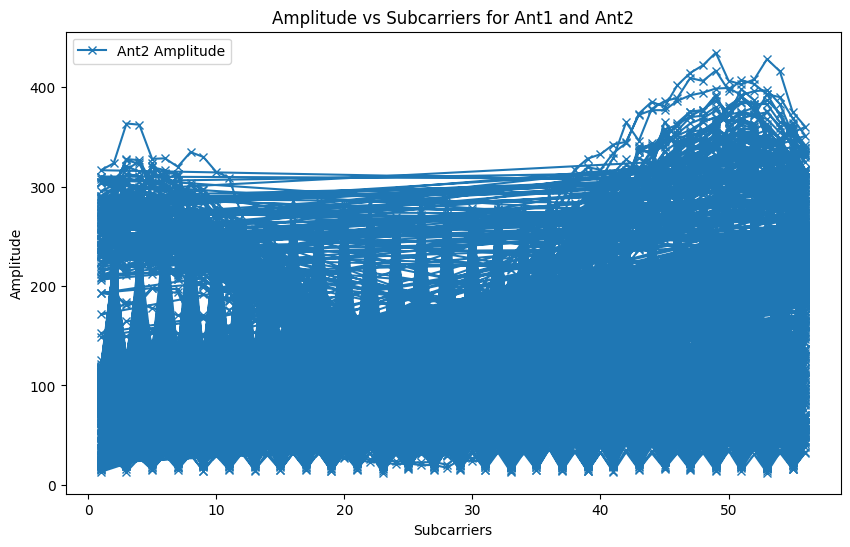

In [77]:
# Plotting the data
plt.figure(figsize=(10, 6))

# Plot Ant1 and Ant2 amplitudes
# plt.plot(data["subcarriers"], data["ant1_amplitude"], label="Ant1 Amplitude", marker='o')
plt.plot(data["subcarriers"], data["ant2_amplitude"], label="Ant2 Amplitude", marker='x')

# Adding labels and title
plt.xlabel("Subcarriers")
plt.ylabel("Amplitude")
plt.title("Amplitude vs Subcarriers for Ant1 and Ant2")
plt.legend()

# Show the plot
plt.show()

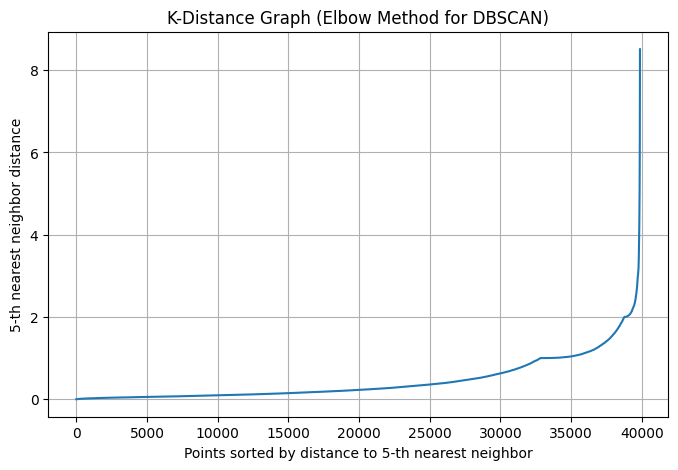

In [78]:
# Step 1: Extract your data (using the amplitude data as an example)
X = data[['subcarriers', 'ant1_amplitude']].values

# Step 2: Use Nearest Neighbors to find the k nearest neighbors
k = 5  # min_samples - 1 for DBSCAN, for example, min_samples = 5, so k = 4
neighbors = NearestNeighbors(n_neighbors=k)
neighbors_fit = neighbors.fit(X)
distances, indices = neighbors_fit.kneighbors(X)

# Step 3: Sort the distances to the k-th nearest neighbor
# The distance to the k-th nearest neighbor is in the last column (index k-1)
k_distances = distances[:, k-1]
k_distances = np.sort(k_distances)

# Step 4: Plot the sorted k-distance graph
plt.figure(figsize=(8, 5))
plt.plot(k_distances)
plt.xlabel('Points sorted by distance to {}-th nearest neighbor'.format(k))
plt.ylabel('{}-th nearest neighbor distance'.format(k))
plt.title('K-Distance Graph (Elbow Method for DBSCAN)')
plt.grid(True)
plt.show()

In [79]:
# def find_optimal_eps(data, MinPts=5):
#     # Compute the pairwise distance matrix
#     data_dist_matrix = pdist(data)
#     data_dist_matrix = squareform(data_dist_matrix)
    
#     n1 = data.shape[0]

#     # Sort distances to find the MinPts+1 nearest distances for each point
#     sorted_distances = np.sort(data_dist_matrix, axis=1)
#     k_distances = sorted_distances[:, MinPts]

#     # Sort and find the distance values for plotting
#     dist_eps = np.sort(k_distances)

#     # Create a K-distance plot to help find Eps value
#     plt.plot(range(1, len(dist_eps) + 1), dist_eps)
#     plt.xlabel("Points")
#     plt.ylabel(f"{MinPts}-Distance")
#     plt.title("K-Distance Graph")
#     plt.show()

#     # Find the optimal Eps by identifying a steep change in the curve
#     eps_diffs = np.diff(dist_eps)
#     highnumb_index = np.argmax(eps_diffs)  # Find the point where the curve has the steepest increase
#     eps = (dist_eps[highnumb_index] + dist_eps[highnumb_index + 1]) / 2

#     print(f"Optimal Eps value: {eps}")
#     return eps

# eps_values = find_optimal_eps(data)

In [80]:
data = data[data['nc'] == 2]

In [81]:
amplitudes = data[['subcarriers', 'ant1_amplitude']].values
min_sample = data.shape[1]
dbscan = hdbscan.HDBSCAN(min_samples=min_sample, core_dist_n_jobs=-1)
# dbscan = DBSCAN(eps=1, min_samples=5)

In [82]:
dbscan.fit(amplitudes)

HDBSCAN(core_dist_n_jobs=-1, min_samples=9)

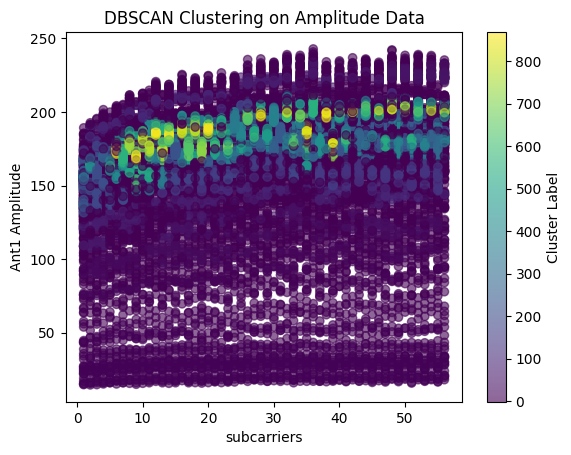

In [83]:
data['cluster'] = dbscan.labels_

data.head()

# Step 5: Visualize the clusters
plt.scatter(data['subcarriers'], data['ant1_amplitude'], c=data['cluster'], cmap='viridis', alpha=0.6)
plt.xlabel('subcarriers')
plt.ylabel('Ant1 Amplitude')
plt.title('DBSCAN Clustering on Amplitude Data')
plt.colorbar(label='Cluster Label')
plt.show()

In [84]:
data.head()

,nc,rssi,rssi1,rssi2,subcarriers,ant1_amplitude,ant2_amplitude,ant1_phase,ant2_phase,cluster
0,2,-0.679725,-1.154376,-0.442531,1,27.459060,92.070625,0.550737,-0.771030,3
1,2,-0.679725,-1.154376,-0.442531,2,27.459060,167.839209,-0.535719,1.108552,3
2,2,-0.679725,-1.154376,-0.442531,3,28.844410,94.339811,0.545210,-0.808344,3
3,2,-0.679725,-1.154376,-0.442531,4,29.154759,174.642492,-0.556226,1.102351,3
4,2,-0.679725,-1.154376,-0.442531,5,30.805844,89.453899,0.525503,-0.799598,3


In [85]:
cleaned_data = data.drop(data[data.cluster < 0].index)
cleaned_data.head()

,nc,rssi,rssi1,rssi2,subcarriers,ant1_amplitude,ant2_amplitude,ant1_phase,ant2_phase,cluster
0,2,-0.679725,-1.154376,-0.442531,1,27.459060,92.070625,0.550737,-0.771030,3
1,2,-0.679725,-1.154376,-0.442531,2,27.459060,167.839209,-0.535719,1.108552,3
2,2,-0.679725,-1.154376,-0.442531,3,28.844410,94.339811,0.545210,-0.808344,3
3,2,-0.679725,-1.154376,-0.442531,4,29.154759,174.642492,-0.556226,1.102351,3
4,2,-0.679725,-1.154376,-0.442531,5,30.805844,89.453899,0.525503,-0.799598,3


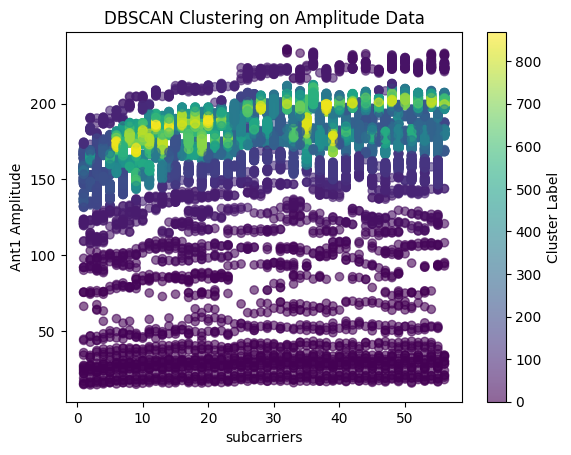

In [86]:
plt.scatter(cleaned_data['subcarriers'], cleaned_data['ant1_amplitude'], c=cleaned_data['cluster'], cmap='viridis', alpha=0.6)
plt.xlabel('subcarriers')
plt.ylabel('Ant1 Amplitude')
plt.title('DBSCAN Clustering on Amplitude Data')
plt.colorbar(label='Cluster Label')
plt.show()

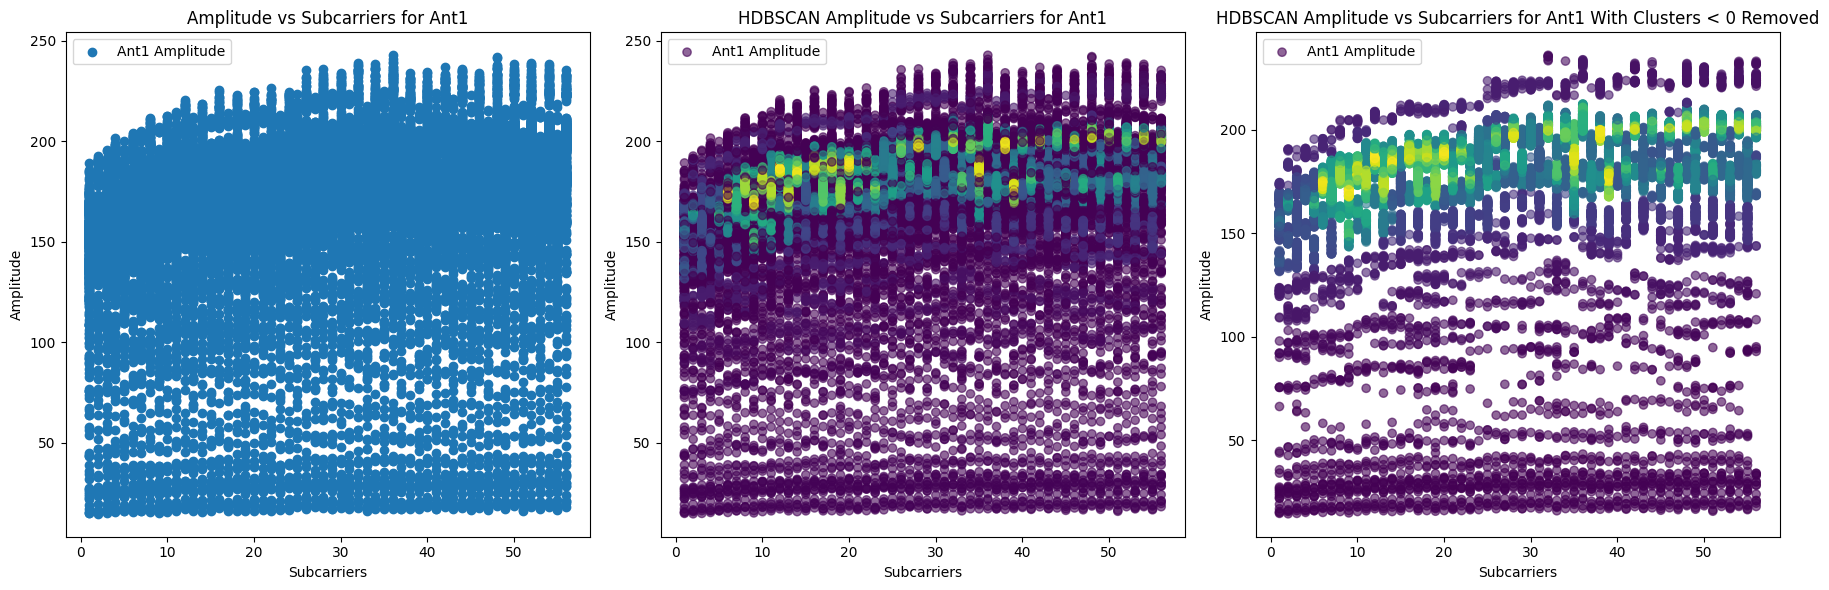

In [87]:
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

nc1 = data_original[data_original['nc'] == 2]

ax[0].scatter(nc1["subcarriers"], nc1["ant1_amplitude"], label="Ant1 Amplitude", marker='o')
ax[0].set_xlabel("Subcarriers")
ax[0].set_ylabel("Amplitude")
ax[0].set_title("Amplitude vs Subcarriers for Ant1")
ax[0].legend()

ax[1].scatter(data["subcarriers"], data["ant1_amplitude"], label="Ant1 Amplitude", c=data['cluster'], cmap='viridis', alpha=0.6)
ax[1].set_xlabel("Subcarriers")
ax[1].set_ylabel("Amplitude")
ax[1].set_title("HDBSCAN Amplitude vs Subcarriers for Ant1")
ax[1].legend()

ax[2].scatter(cleaned_data["subcarriers"], cleaned_data["ant1_amplitude"], label="Ant1 Amplitude", c=cleaned_data['cluster'], cmap='viridis', alpha=0.6)
ax[2].set_xlabel("Subcarriers")
ax[2].set_ylabel("Amplitude")
ax[2].set_title("HDBSCAN Amplitude vs Subcarriers for Ant1 With Clusters < 0 Removed")
ax[2].legend()



# Adjust layout and display the plots
plt.tight_layout()
plt.show()

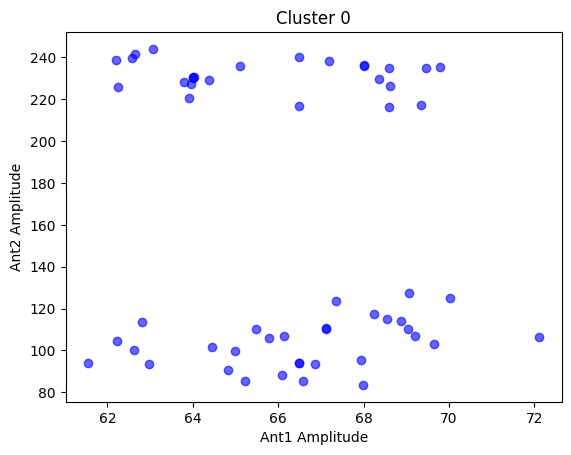

In [88]:
import matplotlib.pyplot as plt

# Extract points from Cluster 0
cluster_0_points = data[data.cluster == 0]

# Plot Cluster 0
plt.scatter(cluster_0_points['ant1_amplitude'], cluster_0_points['ant2_amplitude'], c='blue', alpha=0.6)
plt.xlabel('Ant1 Amplitude')
plt.ylabel('Ant2 Amplitude')
plt.title('Cluster 0')
plt.show()
